# Lab 1 Analysis Example using Thicket

In [46]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [53]:
tk_sorted = th.Thicket.from_caliperreader(glob("*-sorted.cali"))
tk_random = th.Thicket.from_caliperreader(glob("*random.cali"))
tk_reverse = th.Thicket.from_caliperreader(glob("*reverse_sorted.cali"))
tk_perturbed = th.Thicket.from_caliperreader(glob("*perturbed.cali"))
# test = th.Thicket.from_caliperreader(glob("p16-s16777216-random.cali"))
tks = [tk_sorted, tk_random, tk_reverse, tk_perturbed]

In [48]:
test.statsframe.dataframe["time"] = 1
print(test.tree())

NameError: name 'test' is not defined

In [54]:
gbs = []
for tk in tks:
    gbs.append(tk.groupby("input_size"))

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b16c403e7c0>, 262144: <thicket.thicket.Thicket object at 0x2b16b56c7370>, 1048576: <thicket.thicket.Thicket object at 0x2b16c7e52640>, 4194304: <thicket.thicket.Thicket object at 0x2b16c7e526d0>, 16777216: <thicket.thicket.Thicket object at 0x2b16c484b0d0>, 67108864: <thicket.thicket.Thicket object at 0x2b16c4050d60>, 268435456: <thicket.thicket.Thicket object at 0x2b16c2916c70>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b16b56a62b0>, 262144: <thicket.thicket.Thicket object at 0x2b16c383ba00>, 1048576: <thicket.thicket.Thicket object at 0x2b16b547a5e0>, 4194304: <thicket.thicket.Thicket object at 0x2b16b617ea90>, 16777216: <thicket.thicket.Thicket object at 0x2b16b6114df0>, 67108864: <thicket.thicket.Thicket object at 0x2b16b568ea60>, 268435456: <thicket.thicket.Thicket object at 0x2b16b60b01f0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b16c3e48e20>, 262144: <thic

Compose these 3 groups column-wise to get a holistic view of the data

In [55]:
concats = []

for g in gbs:
    concats.append(th.Thicket.concat_thickets(
        thickets=list(g.values()),
        headers=list(g.keys()),
        axis="columns",
        metadata_key="num_procs"
    ))

Perform pandas operations to get the table in a desirable format for plotting

In [56]:
# Drop unwanted columns
column_name_to_drop = ['nid','spot.channel','Min time/rank','Avg time/rank','Total time','Variance time/rank','Retiring','Backend bound',
                       'Frontend bound','Bad speculation']
# column_name_to_drop = ['nid','spot.channel']
# ctk.dataframe.reset_index()

for ctk in concats:
    for level in ctk.dataframe.columns.levels[0]:
        # Check if the column exists in this level
        for c in column_name_to_drop:
            if (level, c) in ctk.dataframe.columns:
                ctk.dataframe = ctk.dataframe.drop((level, c), axis=1)

    # Drop unwanted columns
    ctk.dataframe = ctk.dataframe.reset_index().drop(("node", ""), axis=1)
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
    # ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
    # Drop "time" label as it is redundant
    ctk.dataframe

In [57]:
ctk = concats[1]
ctk.dataframe

65536        262144       1048576  \
                            Max time/rank Max time/rank Max time/rank   
name              num_procs                                             
main              2              0.097758      0.167526      0.518978   
                  4              0.238839      0.380527      0.869018   
                  8              0.496790      0.598724      1.431003   
                  16             1.518817      1.511787      2.691081   
comm              2              0.038983      0.037583      0.036922   
                  4              0.115668      0.146296      0.177588   
                  8              0.319702      0.317506      0.512125   
                  16             1.240497      1.193686      1.424150   
comm_large        2              0.038964      0.037563      0.036903   
                  4              0.115612      0.146246      0.177546   
                  8              0.319617      0.317419      0.512068   
                  16             1.240357      1.193539      1.424054   
MPI_Gather        2              0.019989      0.023188      0.021238   
                  4              0.029990      0.043010      0.042996   
                  8              0.045997      0.045982      0.045981   
                  16             0.095993      0.095991      0.129989   
MPI_Recv          2              0.019866      0.019831      0.014231   
                  4              0.087644      0.102767      0.147963   
                  8              0.279263      0.283024      0.477592   
                  16             1.173928      1.097106      1.326259   
MPI_Send          2              0.000120      0.000384      0.001363   
                  4              0.000139      0.000349      0.001354   
                  8              0.000113      0.000238      0.010732   
                  16             0.000152      0.000241      0.000889   
comp              2              0.021127      0.097796      0.441406   
                  4              0.017829      0.132031      0.672215   
                  8              0.016891      0.191229      0.977819   
                  16             0.005832      0.203360      1.518015   
comp_large        2              0.021087      0.097743      0.441351   
                  4              0.017757      0.131917      0.672114   
                  8              0.016787      0.191096      0.977613   
                  16             0.005677      0.203167      1.517665   
correctness_check 2              0.000349      0.000913      0.008734   
                  4              0.000392      0.002830      0.011374   
                  8              0.000418      0.000922      0.032935   
                  16             0.000413      0.000934      0.002964   
data_init         2              0.000759      0.002974      0.023167   
                  4              0.000390      0.019378      0.026779   
                  8              0.000201      0.008142      0.052009   
                  16             0.000109      0.000389      0.001635   

                                  4194304      16777216      67108864  \
                            Max time/rank Max time/rank Max time/rank   
name              num_procs                                             
main              2              2.137915      9.192707     40.555351   
                  4              3.404808     14.650995     64.208878   
                  8              5.108097     21.428845     93.221264   
                  16             8.836392     36.158616    153.486001   
comm              2              0.060858      0.158745      0.856865   
                  4              0.528001      2.143784      9.587465   
                  8              1.520995      5.988748     25.394508   
                  16             3.927409     13.636360     57.459285   
comm_large        2              0.060839      0.158725      0.856845   
                  4 

In [58]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
vals = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [38]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [39]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [40]:
ctk.dataframe.loc["main",[(262144,'Min time/rank')]]
for i in ctk.dataframe.columns:
    print(i)

KeyError: "None of [MultiIndex([(262144, 'Min time/rank')],\n           )] are in the [columns]"

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


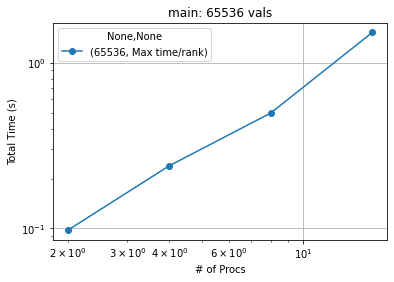

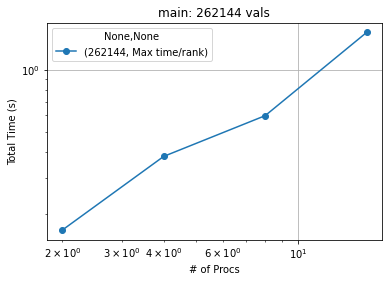

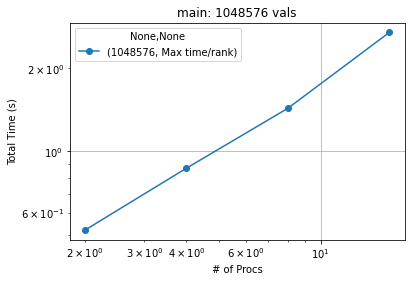

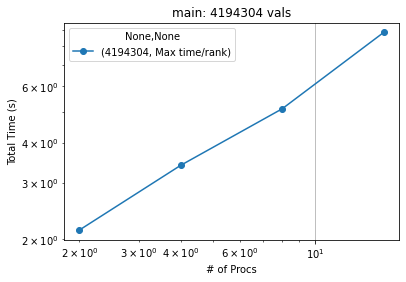

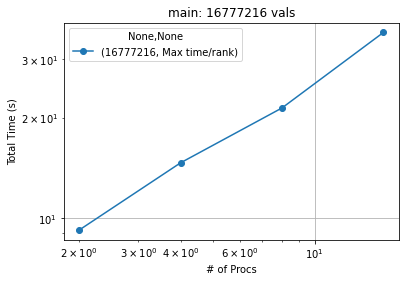

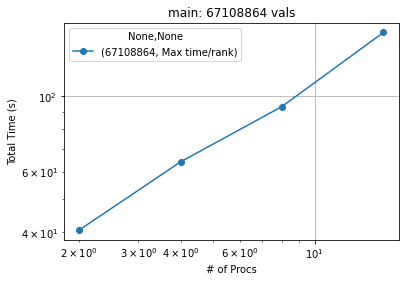

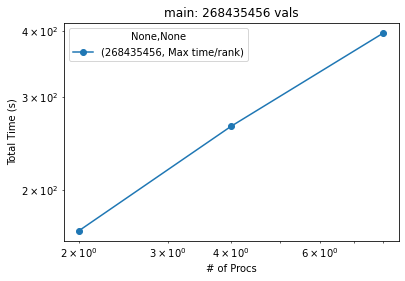

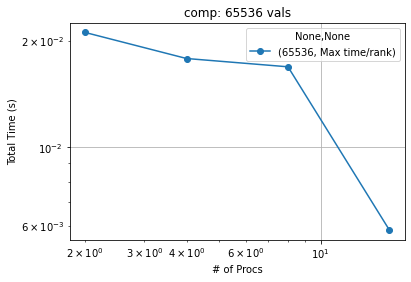

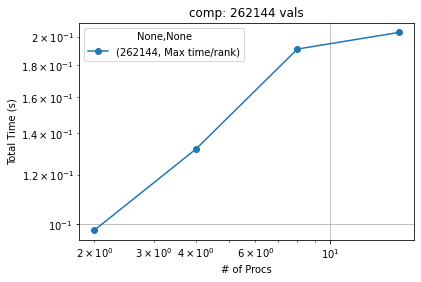

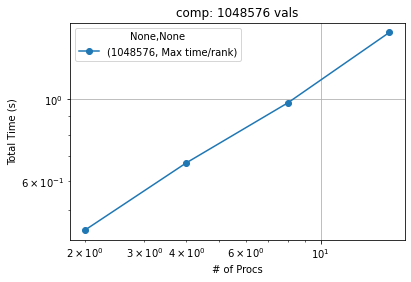

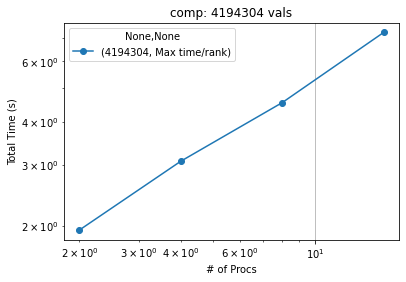

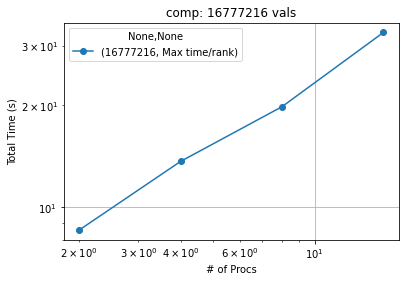

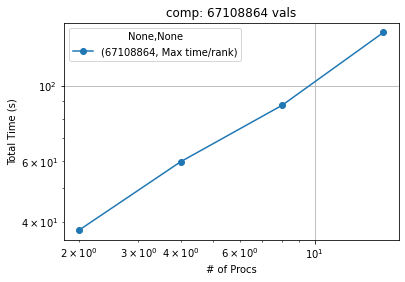

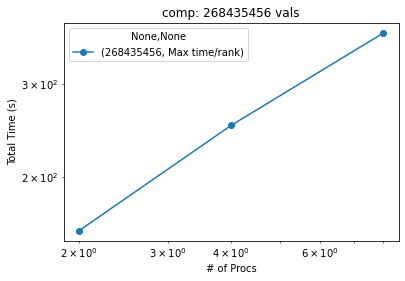

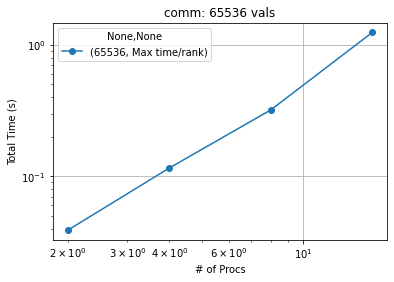

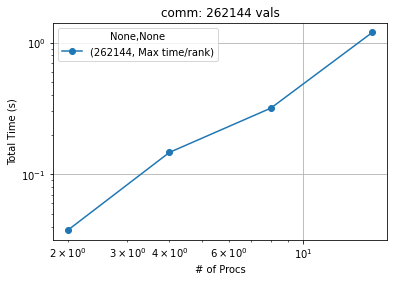

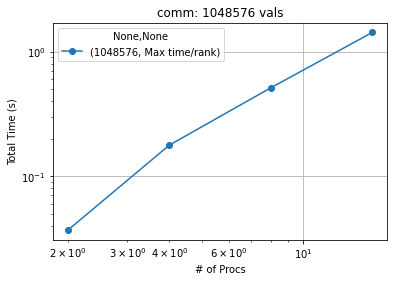

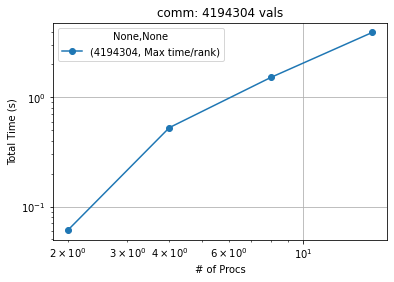

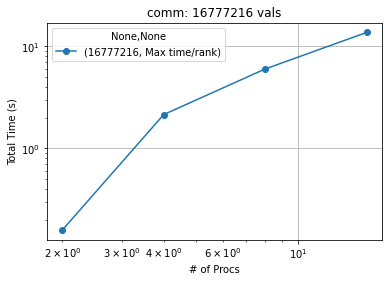

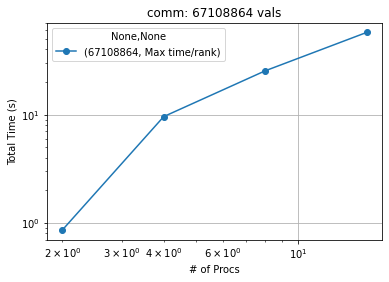

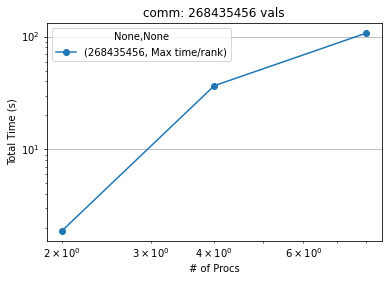

In [61]:
for name in ["main","comp","comm"]:
    for size in ctk.dataframe.columns:
        plot_pandas(
            df=ctk.dataframe.loc[name,[size]],
            title=f'{name}: {size[0]} vals',
            xlabel="# of Procs",
            ylabel="Total Time (s)",
            loglog=True
        )